# Importing necessary libraries

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

# Importing all the datasets

In [89]:
cbyp_01_12 = pd.read_csv (r'Datasets/17_Crime_by_place_of_occurrence_2001_2012.csv')
cbyp_2013 = pd.read_csv (r'Datasets/17_Crime_by_place_of_occurrence_2013.csv')
cbyp_2014 = pd.read_csv (r'Datasets/17_Crime_by_place_of_occurrence_2014.csv')

dw_01_12 = pd.read_csv (r'Datasets/01_District_wise_crimes_committed_IPC_2001_2012.csv')
dw_2013 = pd.read_csv (r'Datasets/01_District_wise_crimes_committed_IPC_2013.csv')
dw_2014 = pd.read_csv (r'Datasets/01_District_wise_crimes_committed_IPC_2014.csv')

# Exploratory Data Analysis (EDA)

In [90]:
cbyp_01_12.head()

,STATE/UT,YEAR,RESIDENTIAL PREMISES - Dacoity,RESIDENTIAL PREMISES - Robbery,RESIDENTIAL PREMISES - Burglary,RESIDENTIAL PREMISES - Theft,HIGHWAYS - Dacoity,HIGHWAYS - Robbery,HIGHWAYS - Burglary,HIGHWAYS - Theft,...,COMMERCIAL ESTABLISHMENTS - Burglary,COMMERCIAL ESTABLISHMENTS - Theft,OTHER PLACES - Dacoity,OTHER PLACES - Robbery,OTHER PLACES - Burglary,OTHER PLACES - Theft,TOTAL - Dacoity,TOTAL - Robbery,TOTAL - Burglary,TOTAL - Theft
0,ANDHRA PRADESH,2001,100,177,5158,4257,57,172,31,74,...,1041,2502,37,232,862,8849,214,629,7220,16751
1,ARUNACHAL PRADESH,2001,9,26,99,131,0,0,0,8,...,84,54,8,40,65,249,22,84,248,443
2,ASSAM,2001,381,191,1695,2901,46,136,7,87,...,442,967,77,261,271,1342,532,687,2423,5367
3,BIHAR,2001,818,326,2486,4741,162,826,0,257,...,231,686,210,880,505,2582,1291,2203,3233,9701
4,CHHATTISGARH,2001,54,42,3336,1417,10,38,12,72,...,370,299,15,239,420,2835,87,338,4144,4812


In [91]:
cbyp_2013.head()

,STATE/UT,YEAR,RESIDENTIAL PREMISES - Dacoity,RESIDENTIAL PREMISES - Robbery,RESIDENTIAL PREMISES - Burglary,RESIDENTIAL PREMISES - Theft,HIGHWAYS - Dacoity,HIGHWAYS - Robbery,HIGHWAYS - Burglary,HIGHWAYS - Theft,...,COMMERCIAL ESTABLISHMENTS - Burglary,COMMERCIAL ESTABLISHMENTS - Theft,OTHER PLACES - Dacoity,OTHER PLACES - Robbery,OTHER PLACES - Burglary,OTHER PLACES - Theft,TOTAL - Dacoity,TOTAL - Robbery,TOTAL - Burglary,TOTAL - Theft
0,Andhra Pradesh,2013,43,229,7264,10539,31,109,0,528,...,796,2578,45,325,1740,15670,125,709,9820,31032
1,Arunachal Pradesh,2013,6,19,85,138,3,12,0,7,...,54,168,15,28,57,200,24,75,196,514
2,Assam,2013,133,313,2652,6449,12,92,17,22,...,542,797,92,437,1072,3223,246,923,4291,10515
3,Bihar,2013,260,85,3084,9360,240,1244,9,588,...,312,2129,42,119,777,7989,579,1521,4185,21423
4,Chhattisgarh,2013,7,15,2759,1356,7,51,67,37,...,313,402,31,271,376,3200,47,351,3527,5189


In [92]:
cbyp_2014.head()

,States/UTs,Year,Residence_Dacoity_Cases reported,Residence_Dacoity_Value of property stolen,Residence_Robbery_Cases reported,Residence_Robbery_Value of property stolen,Residence_Burglary_Cases reported,Residence_Burglary_Value of property stolen,Residence_Theft_Cases reported,Residence_Theft_Value of property stolen,...,OtherPlaces_Theft_Cases reported,OtherPlaces_Theft_Value of property stolen,Total_Dacoity_Cases reported,Total_Dacoity_Value of property stolen,Total_Robbery_Cases reported,Total_Robbery_Value of property stolen,Total_Burglary_Cases reported,Total_Burglary_Value of property stolen,Total_Theft_Cases reported,Total_Theft_Value of property stolen
0,Andhra Pradesh,2014,27,7983001,124,10577950,3530,226363051,5757,199348324,...,4997,199285711,75,27152368,433,41148643,4719,321352316.0,15617,641880290
1,Arunachal Pradesh,2014,3,67500,8,86350,103,6637940,173,15422078,...,158,37247470,12,477000,61,8718930,224,12324815.0,498,78789228
2,Assam,2014,144,10693775,315,4191631,2293,26376373,4503,131897564,...,5981,130654964,267,16603231,1038,18121153,4954,49369570.0,12737,311982322
3,Bihar,2014,174,27725940,117,6558972,3693,262152615,6655,116467719,...,10874,416911296,538,151516733,1600,74012959,4674,279472385.0,22888,693664033
4,Chhattisgarh,2014,27,3076170,25,1137900,1985,85802275,1235,53896428,...,3057,125524854,58,911101420,405,26477826,3247,150182672.0,6098,266495669


In [93]:
dw_01_12.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507


In [94]:
dw_2013.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,Andhra Pradesh,ADILABAD,2013,96,72,13,61,0,61,65,...,30,2394,12,197,138,464,0,376,1390,6381
1,Andhra Pradesh,ANANTAPUR,2013,156,149,3,28,0,28,110,...,29,2537,23,337,43,161,0,573,1634,6913
2,Andhra Pradesh,CHITTOOR,2013,72,61,2,31,0,31,52,...,18,937,13,119,84,435,0,546,2239,5610
3,Andhra Pradesh,CUDDAPAH,2013,93,107,7,19,0,19,84,...,34,2310,9,318,163,207,0,464,1741,7048
4,Andhra Pradesh,CYBERABAD,2013,162,123,16,138,0,138,192,...,40,4284,43,350,338,1526,0,1104,3139,19992


In [95]:
dw_2014.head()

,States/UTs,District,Year,Murder,Attempt to commit Murder,Culpable Homicide not amounting to Murder,Attempt to commit Culpable Homicide,Rape,Custodial Rape,Custodial_Gang Rape,...,Offences promoting enmity between different groups,Promoting enmity between different groups,"Imputation, assertions prejudicial to national integration",Extortion,Disclosure of Identity of Victims,Incidence of Rash Driving,HumanTrafficking,Unnatural Offence,Other IPC crimes,Total Cognizable IPC crimes
0,Andhra Pradesh,Anantapur,2014,134,171,8,0,35,0,0,...,0,0,0,0,0,1038,0,0,3800,8376
1,Andhra Pradesh,Chittoor,2014,84,170,2,0,32,0,0,...,0,0,0,19,0,249,0,0,2567,5374
2,Andhra Pradesh,Cuddapah,2014,80,162,1,0,28,0,0,...,0,0,0,0,0,948,0,0,2604,5803
3,Andhra Pradesh,East Godavari,2014,64,84,2,0,85,0,0,...,0,0,0,32,0,39,0,0,3791,7630
4,Andhra Pradesh,Guntakal Railway,2014,14,4,0,0,0,0,0,...,0,0,0,0,0,1,0,0,37,490


In [96]:
print(dw_01_12.shape)
print(dw_2013.shape)
print(dw_2014.shape)
print(cbyp_01_12.shape)
print(cbyp_2013.shape)
print(cbyp_2014.shape)

(9017, 33)
(823, 33)
(838, 91)
(457, 34)
(38, 34)
(39, 82)


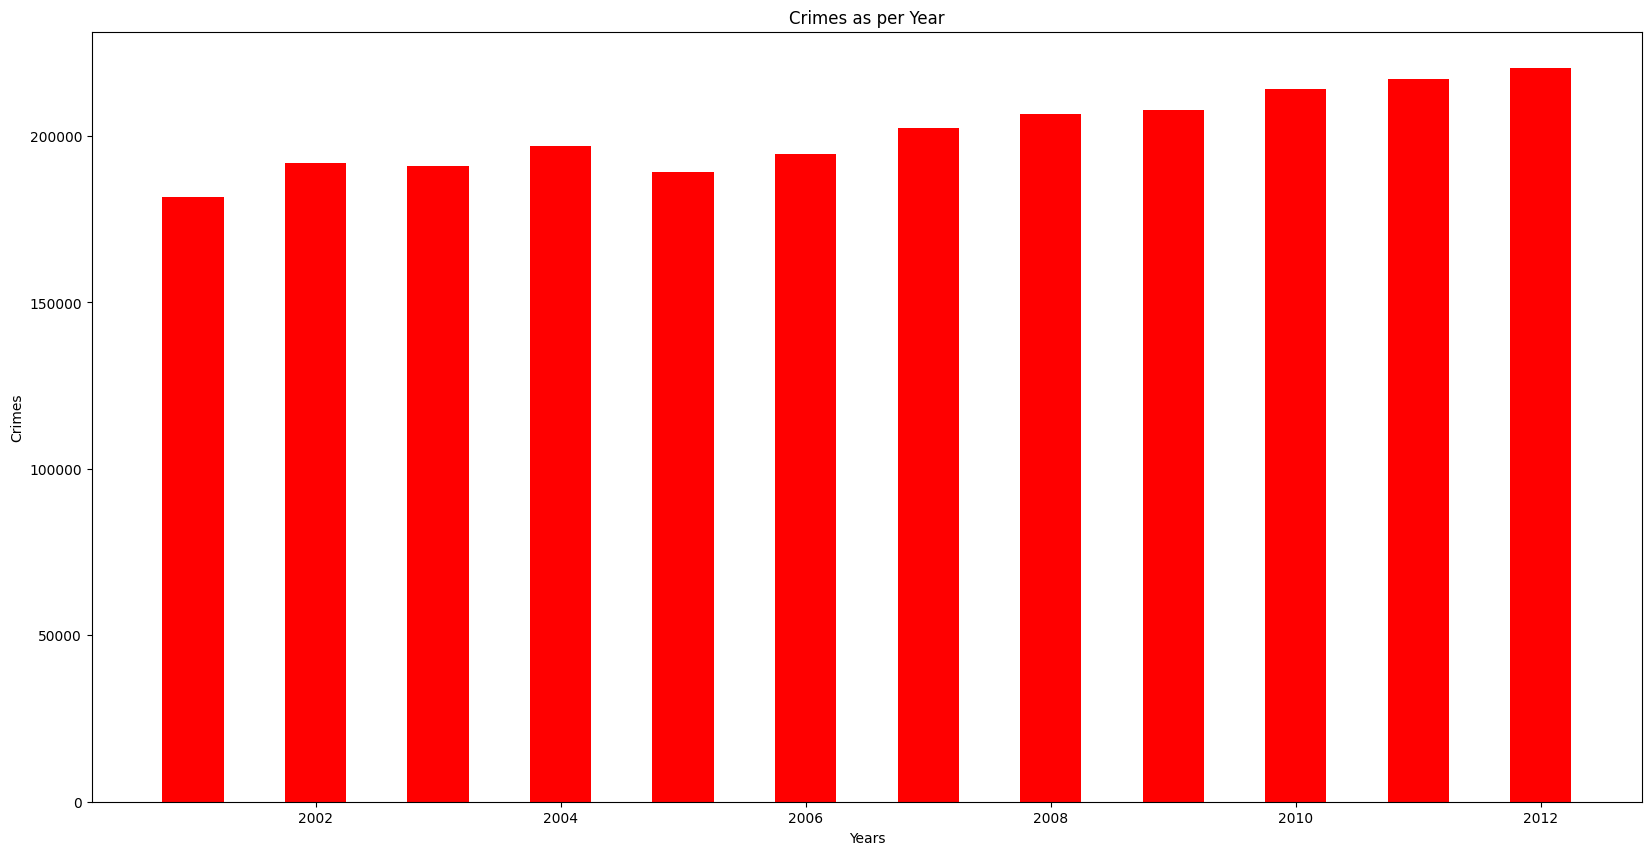

In [97]:
x = dw_01_12['YEAR']
y = dw_01_12['TOTAL IPC CRIMES']
z = dw_01_12['STATE/UT']
k = dw_01_12['KIDNAPPING & ABDUCTION']
fig = plt.figure(figsize = (20, 10))
plt.bar(x, y, color ='red', width = 0.5)
 
plt.xlabel("Years")
plt.ylabel("Crimes")
plt.title("Crimes as per Year")
plt.show()

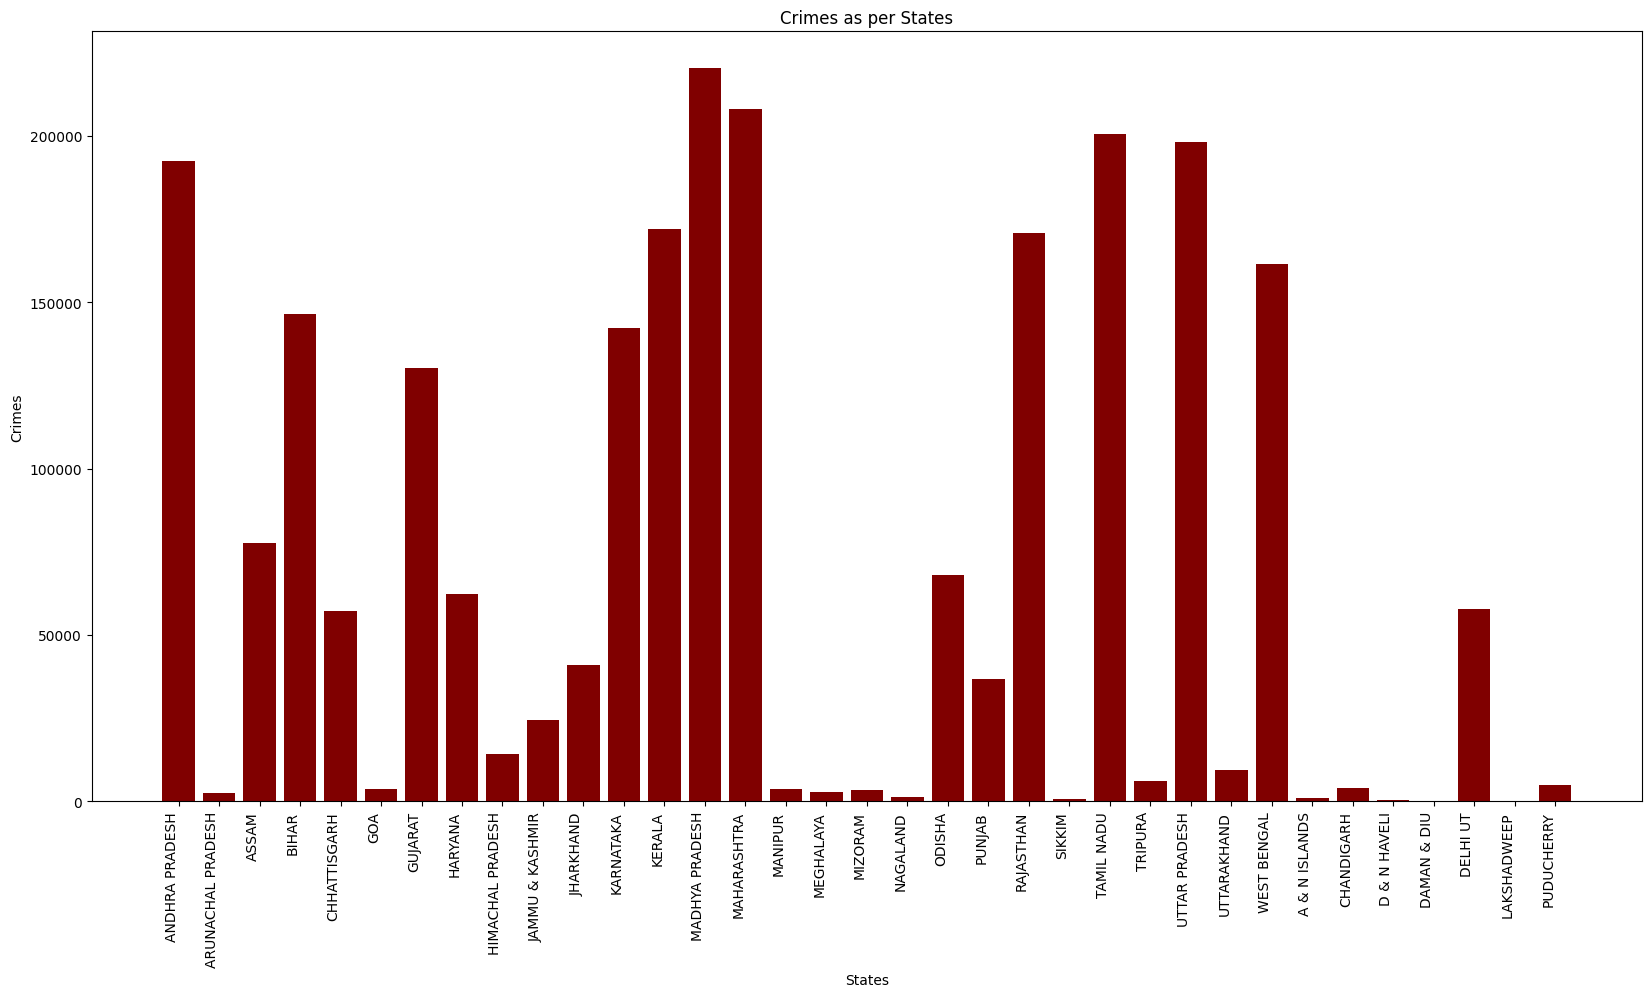

In [98]:
fig = plt.figure(figsize = (20, 10))
plt.bar(z, y, color ='maroon', width = 0.8)
 
plt.xlabel("States")
plt.ylabel("Crimes")
plt.title("Crimes as per States")

ax = plt.subplot()
plt.setp(ax.get_xticklabels(), rotation=90, ha='right')

plt.show()

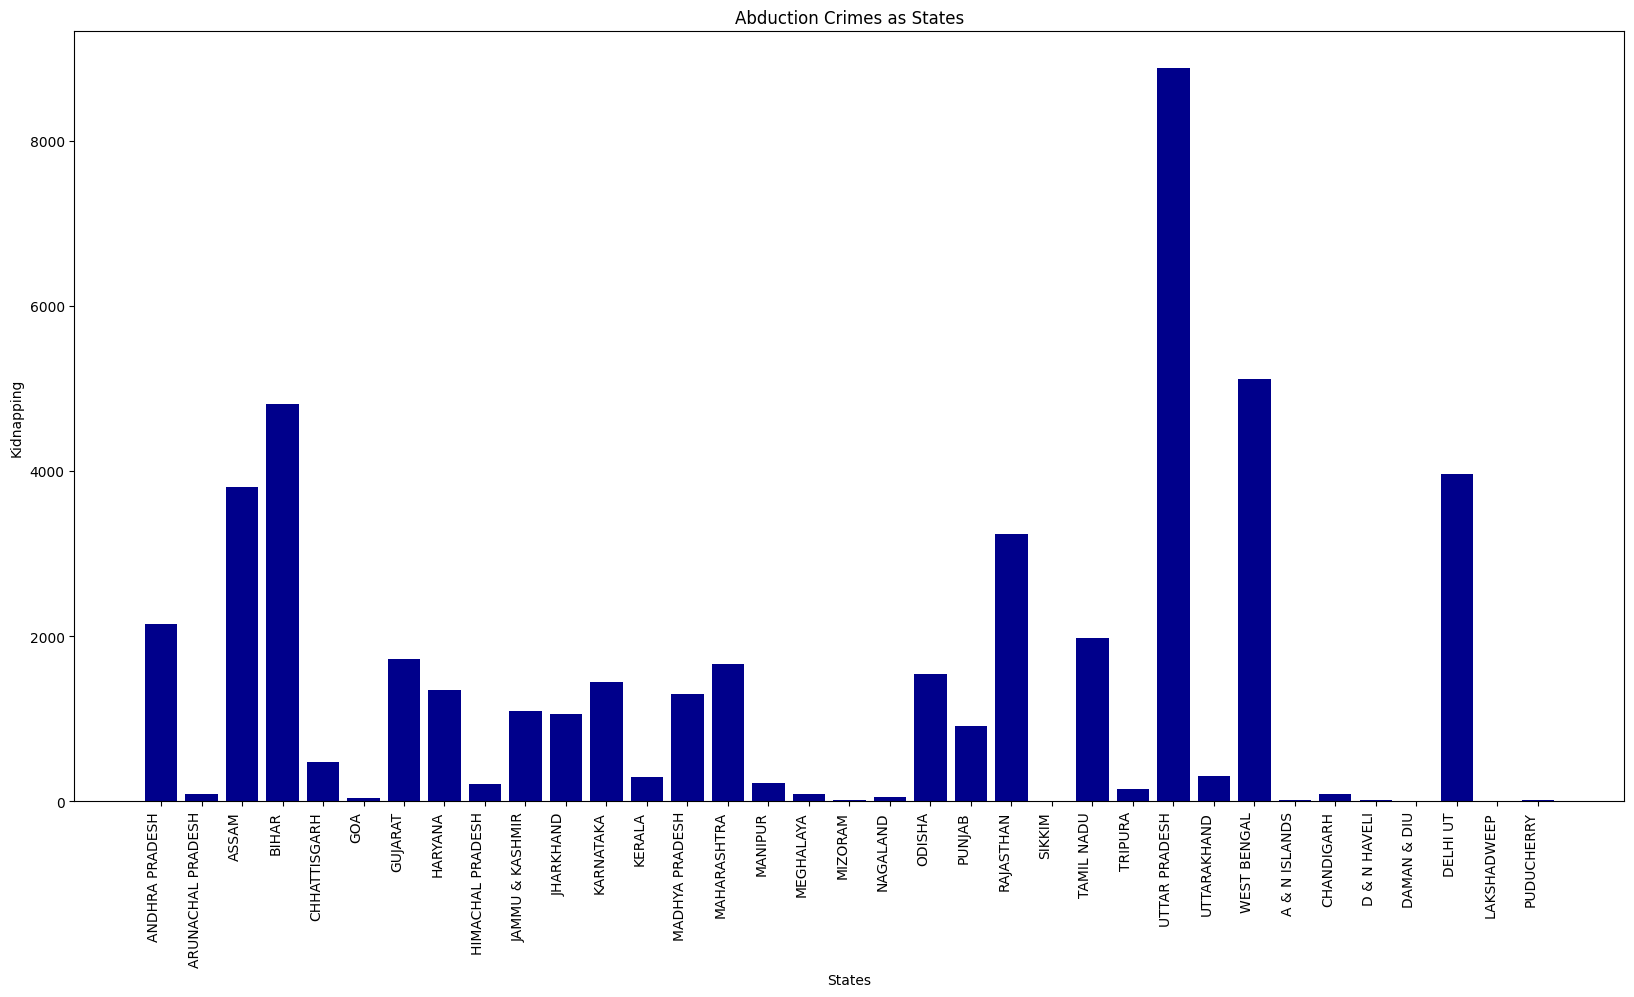

In [99]:
fig = plt.figure(figsize = (20, 10))
plt.bar(z, k, color ='darkblue', width = 0.8)
 
plt.xlabel("States")
plt.ylabel("Kidnapping")
plt.title("Abduction Crimes as States")

ax = plt.subplot()
plt.setp(ax.get_xticklabels(), rotation=90, ha='right')

plt.show()

# Data Cleaning and Preprocessing

In [100]:
# removing all the irrelevant columns
cols = [c for c in cbyp_2014.columns if c.lower()[:9] != 'residence']
cbyp_2014 = cbyp_2014[cols]
cols2 = [c for c in cbyp_01_12.columns if c.lower()[:11] != 'residential']
cbyp_01_12 = cbyp_01_12[cols2]
cols3 = [c for c in cbyp_2014.columns if c.lower()[-1] != 'n']
cbyp_2014 = cbyp_2014[cols3]
cols4 = [c for c in cbyp_2014.columns if c.lower()[:3] != 'atm']
cbyp_2014 = cbyp_2014[cols4]
cols5 = [c for c in cbyp_2014.columns if c.lower()[:9] != 'religious']
cbyp_2014 = cbyp_2014[cols5]
cols6 = [c for c in cbyp_2013.columns if c.lower()[:11] != 'residential']
cbyp_2013 = cbyp_2013[cols6]

dw_01_12 = dw_01_12.drop(["CRUELTY BY HUSBAND OR HIS RELATIVES"], axis = 1)
dw_01_12 = dw_01_12.drop(["DOWRY DEATHS"], axis = 1)
dw_01_12 = dw_01_12.drop(["DACOITY"], axis = 1)
dw_2013 = dw_2013.drop(["CRUELTY BY HUSBAND OR HIS RELATIVES"], axis = 1)
dw_2013 = dw_2013.drop(["DACOITY"], axis = 1)
dw_2013 = dw_2013.drop(["DOWRY DEATHS"], axis = 1)

In [101]:
# drop all irrelevant columns
dw_2014 = dw_2014.drop(
    ['Custodial_Gang Rape',
     'Attempt to commit Culpable Homicide',
     'Custodial_Other Rape',
     'Rape other than Custodial',
     'Rape_Gang Rape',
     'Dacoity',
     'Cruelty by Husband or his Relatives',
     'Dowry Deaths',
     'Attempt to commit Rape',
     'Kidnapping & Abduction',
     'Kidnapping & Abduction in order to Murder',
     'Kidnapping for Ransom',
     'Dacoity with Murder',
     'Other Dacoity',
     'House Trespass & House Breaking',
     'Unlawful Assembly',
     'Riots_Communal',
     'Riots_Industrial',
     'Riots_Political',
     'Riots_Caste Conflict',
     'Riots_SC/STs Vs Non-SCs/STs',
     'Riots_Other Caste Conflict',
     'Riots_Agrarian',
     'Riots_Students',
     'Riots_Sectarian',
     'Riots_Others',
     'Forgery',
     'Counterfeit Offences related to Counterfeit Coin',
     'Counterfeiting Government Stamp',
     'Counterfeit currency & Bank notes',
     'Counterfeiting currency notes/Bank notes',
     'Using forged or counterfeiting currency/Bank notes',
     'Possession of forged or counterfeiting currency/Bank notes',
     'Making or Possessing materials for forged currency/Bank notes',
     'Making or Using documents resembling currency',
     'Hurt',
     'Acid attack',
     'Attempt to Acid Attack',
     'Sexual Harassment',
     'Assault or use of criminal force to women with intent to Disrobe',
     'Voyeurism',
     'Stalking',
     'Other Assault on Women',
     'At Office premises',
     'Other places related to work',
     'In Public Transport system',
     'Places other than 231, 232 & 233',
     'Deaths due to negligent driving/act',
     'Deaths due to Other Causes',
     'Offences against State',
     'Sedition',
     'Other offences against State',
     'Offences promoting enmity between different groups',
     'Promoting enmity between different groups',
     'Imputation, assertions prejudicial to national integration',
     'Extortion',
     'Disclosure of Identity of Victims',
     'Incidence of Rash Driving',
     'HumanTrafficking',
     'Unnatural Offence'], axis=1)

dict1 = {
    'States/UTs' : 'STATE/UT',
    'Year' : 'YEAR',
    'Highways_Dacoity_Cases reported' : 'HIGHWAYS - Dacoity',
    'Highways_Robbery_Cases reported' : 'HIGHWAYS - Robbery',
    'Highways_Burglary_Cases reported' : 'HIGHWAYS - Burglary',
    'Highways_Theft_Cases reported' : 'HIGHWAYS - Theft',
    'RiverOrSea_Dacoity_Cases reported' : 'RIVER and SEA - Dacoity',
    'RiverOrSea_Robbery_Cases reported' : 'RIVER and SEA - Robbery',
    'RiverOrSea_Burglary_Cases reported' : 'RIVER and SEA - Burglary',
    'RiverOrSea_Theft_Cases reported' : 'RIVER and SEA - Theft',
    'Railways_Dacoity_Cases reported' : 'RAILWAYS - Dacoity',
    'Railways_Robbery_Cases reported' : 'RAILWAYS - Robbery',
    'Railways_Burglary_Cases reported' : 'RAILWAYS - Burglary',
    'Railways_Theft_Cases reported' : 'RAILWAYS - Theft',
    'Bank_Dacoity_Cases reported' : 'BANKS - Dacoity',
    'Bank_Robbery_Cases reported' : 'BANKS - Robbery',
    'Bank_Burglary_Cases reported' : 'BANKS - Burglary',
    'Bank_Theft_Cases reported' : 'BANKS - Theft',
    'CommEst_Dacoity_Cases reported' : 'COMMERCIAL ESTABLISHMENTS - Dacoity',
    'CommEst_Robbery_Cases reported' : 'COMMERCIAL ESTABLISHMENTS - Robbery',
    'CommEst_Burglary_Cases reported' : 'COMMERCIAL ESTABLISHMENTS - Burglary',
    'CommEst_Theft_Cases reported' : 'COMMERCIAL ESTABLISHMENTS - Theft',
    'OtherPlaces_Dacoity_Cases reported' : 'OTHER PLACES - Dacoity',
    'OtherPlaces_Robbery_Cases reported' : 'OTHER PLACES - Robbery',
    'OtherPlaces_Burglary_Cases reported' : 'OTHER PLACES - Burglary',
    'OtherPlaces_Theft_Cases reported' : 'OTHER PLACES - Theft',
    'Total_Dacoity_Cases reported' : 'TOTAL - Dacoity',
    'Total_Robbery_Cases reported' : 'TOTAL - Robbery',
    'Total_Burglary_Cases reported' : 'TOTAL - Burglary',
    'Total_Theft_Cases reported' : 'TOTAL - Theft'
}

cbyp_2014.rename(columns=dict1, inplace=True)

dict2 = {
    'States/UTs' : 'STATE/UT',
    'District' : 'DISTRICT',
    'Year' : 'YEAR',
    'Murder' : 'MURDER',
    'Attempt to commit Murder' : 'ATTEMPT TO MURDER',
    'Culpable Homicide not amounting to Murder' : 'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER',
    'Rape' : 'RAPE',
    'Custodial Rape' : 'CUSTODIAL RAPE',
    'Rape_Others' : 'OTHER RAPE',
    'Kidnapping & Abduction_Total' : 'KIDNAPPING & ABDUCTION',
    'Kidnapping & Abduction of Women to compel her for marriage' : 'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
    'Other Kidnapping' : 'KIDNAPPING AND ABDUCTION OF OTHERS',
    'Making Preparation and Assembly for committing Dacoity' : 'PREPARATION AND ASSEMBLY FOR DACOITY',
    'Robbery' : 'ROBBERY',
    'Criminal Trespass/Burglary' : 'BURGLARY',
    'Criminal Trespass or Burglary' : 'BURGLARY2',
    'Theft' : 'THEFT',
    'Auto Theft' : 'AUTO THEFT',
    'Other Thefts' : 'OTHER THEFT',
    'Riots' : 'RIOTS',
    'Criminal Breach of Trust' : 'CRIMINAL BREACH OF TRUST',
    'Cheating' : 'CHEATING',
    'Counterfeiting' : 'COUNTERFIETING',
    'Arson' : 'ARSON',
    'Grievous Hurt' : 'HURT/GREVIOUS HURT',
    'Assault on Women with intent to outrage her Modesty' : 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
    'Insult to the Modesty of Women' : 'INSULT TO MODESTY OF WOMEN',
    'Importation of Girls from Foreign Country' : 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
    'Causing Death by Negligence' : 'CAUSING DEATH BY NEGLIGENCE',
    'Other IPC crimes' : 'OTHER IPC CRIMES',
    'Total Cognizable IPC crimes' : 'TOTAL IPC CRIMES'
}

dw_2014.rename(columns=dict2, inplace=True)

In [102]:
# remove residential crime columns
cols = [c for c in cbyp_2014.columns if c != 'residence']
cbyp_2014 = cbyp_2014[cols]

In [103]:
# merging the two same named columns
dw_2014['BURGLARY'] = dw_2014['BURGLARY'] + dw_2014['BURGLARY2']
del dw_2014['BURGLARY2']

In [104]:
# concatenate individual datasets into one
frames1 = [cbyp_01_12,cbyp_2013,cbyp_2014]
by_place = pd.concat(frames1)
frames2 = [dw_01_12,dw_2013,dw_2014]
dist_wise = pd.concat(frames2)
print(by_place.shape)
print(dist_wise.shape)

(534, 30)
(10678, 30)


In [105]:
dist_wise[dist_wise['STATE/UT'] == 'TAMIL NADU'].head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
535,TAMIL NADU,ARIYALUR,2001,24,41,1,6,0,6,25,...,22,0,17,495,38,4,0,60,741,1754
536,TAMIL NADU,CHENGAI,2001,78,98,0,20,0,20,8,...,96,4,0,699,58,8,0,521,3793,7035
537,TAMIL NADU,CHENNAI,2001,91,298,0,28,0,28,40,...,600,0,0,813,70,209,0,675,1239,7292
538,TAMIL NADU,CHENNAI RLY.,2001,5,1,0,0,0,0,0,...,7,0,0,24,5,0,0,0,271,493
539,TAMIL NADU,COIMBATORE RURAL,2001,77,49,3,18,0,18,38,...,102,4,30,1044,75,25,0,672,5015,9115


In [106]:
indexDaman = by_place[(by_place['STATE/UT'] == 'DAMAN & DIU') & (by_place['COMMERCIAL ESTABLISHMENTS - Burglary'] == 0)].index
by_place.drop(indexDaman , inplace=True)

In [107]:
# renaming all the columns to one common name
by_place['STATE/UT'] = by_place['STATE/UT'].replace(['A & N ISLANDS'],'A&N ISLANDS')
by_place['STATE/UT'] = by_place['STATE/UT'].replace(['D & N HAVELI'],'D&N HAVELI')
by_place['STATE/UT'] = by_place['STATE/UT'].replace(['DELHI UT'],'DELHI')
by_place['STATE/UT'] = by_place['STATE/UT'].replace(['TOTAL (ALL-INDIA)'],'TOTAL (ALL INDIA)')
by_place['STATE/UT'] = by_place['STATE/UT'].replace(['TOTAL (STATE)'],'TOTAL (STATES)')

dist_wise['STATE/UT'] = dist_wise['STATE/UT'].replace(['A & N ISLANDS'],'A&N ISLANDS')
dist_wise['STATE/UT'] = dist_wise['STATE/UT'].replace(['D & N HAVELI'],'D&N HAVELI')
dist_wise['STATE/UT'] = dist_wise['STATE/UT'].replace(['DELHI UT'],'DELHI')

In [108]:
# uppercase'ing all the State & District Names for uniformity
bUpper = by_place['STATE/UT'].map(lambda x : x.upper())
by_place['STATE/UT'] = bUpper

dUpper = dist_wise['STATE/UT'].map(lambda x : x.upper())
dist_wise['STATE/UT'] = dUpper

iUpper = dist_wise['DISTRICT'].map(lambda x : x.upper())
dist_wise['DISTRICT'] = iUpper

In [109]:
for i in dist_wise['STATE/UT'].unique():
  print(i)

ANDHRA PRADESH
ARUNACHAL PRADESH
ASSAM
BIHAR
CHHATTISGARH
GOA
GUJARAT
HARYANA
HIMACHAL PRADESH
JAMMU & KASHMIR
JHARKHAND
KARNATAKA
KERALA
MADHYA PRADESH
MAHARASHTRA
MANIPUR
MEGHALAYA
MIZORAM
NAGALAND
ODISHA
PUNJAB
RAJASTHAN
SIKKIM
TAMIL NADU
TRIPURA
UTTAR PRADESH
UTTARAKHAND
WEST BENGAL
A&N ISLANDS
CHANDIGARH
D&N HAVELI
DAMAN & DIU
DELHI
LAKSHADWEEP
PUDUCHERRY
DELHI UT
TELANGANA


In [110]:
print(dw_01_12.shape)
print(dw_2013.shape)
print(dw_2014.shape)

print(cbyp_01_12.shape)
print(cbyp_2013.shape)
print(cbyp_2014.shape)

(9017, 30)
(823, 30)
(838, 30)
(457, 30)
(38, 30)
(39, 30)


It is clearly evident that all the tables, now are under a common structure.

In [111]:
# group both the datasets
place_group = by_place.groupby(['STATE/UT'], as_index=False).sum()
district_group = dist_wise.groupby(['STATE/UT', 'DISTRICT'], as_index=False).sum()

In [112]:
state_group = district_group[district_group['DISTRICT'] == 'TOTAL']
state_group

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
8,A&N ISLANDS,TOTAL,26092,168,76,25,141,0,140,116,...,324,12,103,1134,255,48,0,66,4584,9848
36,ANDHRA PRADESH,TOTAL,26092,32931,23960,1815,14440,2,14424,22305,...,103934,3269,12418,547162,56546,38780,17,145814,526439,2133585
70,ARUNACHAL PRADESH,TOTAL,26092,927,465,40,583,4,574,1003,...,623,53,289,5404,905,21,0,830,8116,30495
108,ASSAM,TOTAL,26092,16883,6804,775,18158,5,18130,32762,...,15347,960,8661,76766,16719,113,9,32284,210566,692101
160,BIHAR,TOTAL,26092,44648,45298,3873,14251,2,14225,43790,...,35877,1136,9026,206617,8148,295,445,49161,614390,1523888
164,CHANDIGARH,TOTAL,26092,267,334,85,340,0,340,827,...,2548,27,75,835,401,145,0,195,12085,44028
199,CHHATTISGARH,TOTAL,26092,13058,8626,377,13274,0,13210,5359,...,7928,599,3444,88987,21287,1804,5,29194,267752,619227
203,D&N HAVELI,TOTAL,26092,112,32,5,61,0,61,155,...,193,15,60,331,52,5,0,213,1889,4928
207,DAMAN & DIU,TOTAL,26092,75,44,2,22,0,22,41,...,111,30,34,205,18,2,0,328,698,3181
255,DELHI UT,TOTAL,2014,586,770,58,2096,0,1949,7143,...,4601,74,190,690,4322,1361,0,1959,21396,155654


In [113]:
place_group

,STATE/UT,YEAR,HIGHWAYS - Dacoity,HIGHWAYS - Robbery,HIGHWAYS - Burglary,HIGHWAYS - Theft,RIVER and SEA - Dacoity,RIVER and SEA - Robbery,RIVER and SEA - Burglary,RIVER and SEA - Theft,...,COMMERCIAL ESTABLISHMENTS - Burglary,COMMERCIAL ESTABLISHMENTS - Theft,OTHER PLACES - Dacoity,OTHER PLACES - Robbery,OTHER PLACES - Burglary,OTHER PLACES - Theft,TOTAL - Dacoity,TOTAL - Robbery,TOTAL - Burglary,TOTAL - Theft
0,A & N ISLANDS,2014,0,0,0,0,0,0,0,0,...,9,6,0,2,13,31,0,2,64,45
1,A&N ISLANDS,26091,0,0,0,0,0,0,1,40,...,115,146,16,64,201,698,16,75,934,1161
2,ANDHRA PRADESH,28105,527,1750,505,6135,3,23,101,503,...,13281,34585,607,3452,16549,162292,2187,8747,111875,333839
3,ARUNACHAL PRADESH,28105,24,104,9,219,0,2,0,5,...,759,987,112,339,891,2403,296,979,3200,6190
4,ASSAM,28105,457,1157,597,2172,19,15,16,50,...,6734,13945,943,4095,13068,43200,4683,9428,43997,108727
5,BIHAR,28105,2387,14381,305,7102,4,38,0,80,...,3617,18278,1652,7670,7532,74541,12216,26787,49152,197683
6,CHANDIGARH,28105,0,0,0,0,0,0,0,0,...,1064,4864,31,386,180,8881,48,524,3339,21253
7,CHHATTISGARH,28105,134,849,762,1245,5,2,0,13,...,4047,5922,606,3997,6457,44100,1573,5869,51430,74160
8,D&N HAVELI,28105,1,7,1,43,0,0,0,21,...,150,222,12,11,76,262,41,32,424,869
9,DAMAN & DIU,28105,0,0,0,1,1,0,0,7,...,250,91,17,15,50,432,40,29,520,633


# Discrepancies Resolved
by_place
  1. 2008 -> daman & diu repeats
  2. 2014 -> telangana extra state

dist_wise
  1. dist_wise has two burglaries. hence, 31 
  


* dropped all the residence-based crimes columns
* renamed all the columns to common names
* merged three datasets to one dataset





In [114]:
print(by_place.info())
print(dist_wise.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533 entries, 0 to 38
Data columns (total 30 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   STATE/UT                              533 non-null    object
 1   YEAR                                  533 non-null    int64 
 2   HIGHWAYS - Dacoity                    533 non-null    int64 
 3   HIGHWAYS - Robbery                    533 non-null    int64 
 4   HIGHWAYS - Burglary                   533 non-null    int64 
 5   HIGHWAYS - Theft                      533 non-null    int64 
 6   RIVER and SEA - Dacoity               533 non-null    int64 
 7   RIVER and SEA - Robbery               533 non-null    int64 
 8   RIVER and SEA - Burglary              533 non-null    int64 
 9   RIVER and SEA - Theft                 533 non-null    int64 
 10  RAILWAYS - Dacoity                    533 non-null    int64 
 11  RAILWAYS - Robbery               

In [115]:
#@title to download the preprocessed files
# by_place.to_csv('by_place.csv')
# files.download('by_place.csv')
# dist_wise.to_csv('dist_wise.csv')
# files.download('dist_wise.csv')

# Model Building

In [116]:
district_group.sample(5)

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
991,UTTAR PRADESH,MAHARAJGANJ,28105,413,180,188,253,0,249,572,...,751,49,43,1253,228,228,0,1265,4487,12604
211,DELHI,CRIME BRANCH,10050,4,20,0,4,0,4,4,...,218,21,0,0,0,0,0,0,104,393
778,PUNJAB,PATHANKOT,8050,39,26,8,45,0,45,59,...,246,1,3,122,25,0,0,270,628,2032
963,UTTAR PRADESH,FATEHGARH,28105,1013,938,225,200,0,196,933,...,610,27,20,1385,327,222,0,868,6717,18246
986,UTTAR PRADESH,KAUSHAMBI,28105,739,330,201,267,10,256,544,...,559,13,54,1605,571,95,0,1364,6259,16723


In [117]:
# choosing features for training and testing
d = pd.DataFrame()
d['STATE'] = district_group['STATE/UT']
d['DISTRICT'] = district_group['DISTRICT']
d['CASES'] = district_group['TOTAL IPC CRIMES'] + district_group['OTHER IPC CRIMES']
d.head()

,STATE,DISTRICT,CASES
0,A&N ISLANDS,A AND N ISLANDS,1144
1,A&N ISLANDS,ANDAMAN,11015
2,A&N ISLANDS,CAR,68
3,A&N ISLANDS,NICOBAR,395
4,A&N ISLANDS,NORTH,432


In [118]:
d['STATE'].value_counts()

UTTAR PRADESH        87
MADHYA PRADESH       64
TAMIL NADU           59
GUJARAT              57
KARNATAKA            55
RAJASTHAN            53
MAHARASHTRA          52
BIHAR                52
WEST BENGAL          48
ODISHA               42
PUNJAB               40
ASSAM                38
ANDHRA PRADESH       38
JAMMU & KASHMIR      37
CHHATTISGARH         35
HARYANA              32
JHARKHAND            30
KERALA               29
DELHI UT             25
DELHI                25
ARUNACHAL PRADESH    25
HIMACHAL PRADESH     21
MEGHALAYA            16
UTTARAKHAND          15
MANIPUR              15
TELANGANA            14
TRIPURA              14
MIZORAM              13
NAGALAND             13
A&N ISLANDS          10
SIKKIM                7
GOA                   5
PUDUCHERRY            5
D&N HAVELI            4
DAMAN & DIU           4
CHANDIGARH            3
LAKSHADWEEP           3
Name: STATE, dtype: int64

In [119]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
d.iloc[:,0] = le.fit_transform(d.iloc[:,0])
d.iloc[:,1] = le.fit_transform(d.iloc[:,1])

In [120]:
d

,STATE,DISTRICT,CASES
0,0,2,1144
1,0,37,11015
2,0,153,68
3,0,641,395
4,0,644,432
...,...,...,...
1080,36,809,10707
1081,36,830,29768
1082,36,887,1799185
1083,36,913,59936


In [121]:
# split into dependant and independant 
x = d.iloc[:,:-1]
y = d.iloc[:, -1]

In [122]:
x.head()

,STATE,DISTRICT
0,0,2
1,0,37
2,0,153
3,0,641
4,0,644


In [123]:
y.head()

0     1144
1    11015
2       68
3      395
4      432
Name: CASES, dtype: int64

In [124]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=2)

## Clustering

### K-Means Clustering

In [125]:
from sklearn.cluster import KMeans

In [126]:
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score
X = d[['STATE', 'DISTRICT', 'CASES']]
se = [] 
sil_scores = []
calinski_score = []
davies_score = []
index = range(2, 9)
for i in index:
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(X)
    se.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X, labels))
    calinski_score.append(calinski_harabasz_score(X, labels))
    davies_score.append(davies_bouldin_score(X, labels))
 
    print('Intertia at K =', i, ':', kmeans.inertia_)
    print("Silhouette Coefficient: %0.3f" % silhouette_score(X, labels))
    print("Calinski-Harabasz Index: %0.3f" % calinski_harabasz_score(X, labels))
    print("Davies-Bouldin Index: %0.3f" % davies_bouldin_score(X, labels))
    print("---------------------------------------------------------------")

Intertia at K = 2 : 12049146620029.023
Silhouette Coefficient: 0.973
Calinski-Harabasz Index: 7099.322
Davies-Bouldin Index: 0.199
---------------------------------------------------------------
Intertia at K = 3 : 7630529073291.3545
Silhouette Coefficient: 0.867
Calinski-Harabasz Index: 5913.268
Davies-Bouldin Index: 0.478
---------------------------------------------------------------
Intertia at K = 4 : 4871240055578.308
Silhouette Coefficient: 0.864
Calinski-Harabasz Index: 6373.607
Davies-Bouldin Index: 0.549
---------------------------------------------------------------
Intertia at K = 5 : 2890362542452.1904
Silhouette Coefficient: 0.694
Calinski-Harabasz Index: 8233.855
Davies-Bouldin Index: 0.517
---------------------------------------------------------------
Intertia at K = 6 : 2085059177495.0488
Silhouette Coefficient: 0.694
Calinski-Harabasz Index: 9206.077
Davies-Bouldin Index: 0.506
---------------------------------------------------------------
Intertia at K = 7 : 131050

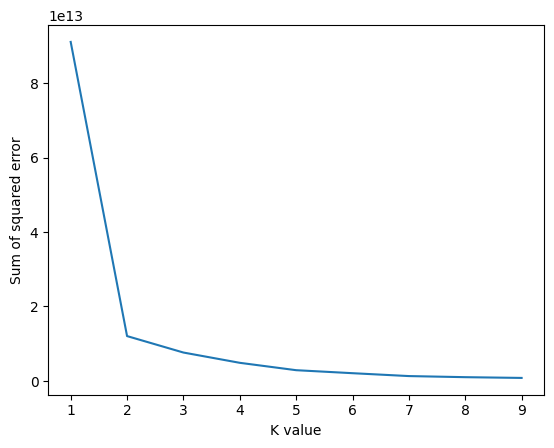

In [127]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(d[['STATE', 'DISTRICT', 'CASES']])
    sse.append(km.inertia_)

plt.xlabel('K value')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

**FACTS**
1.   *A good model is one with **low** inertia AND a low number of clusters (K)*
2.   *The **higher** the Silhouette Coefficients (the closer to +1), the more is the separation between clusters*
3.   *The **higher** the index the better is clustering*
4.   *The main motive is to **decrease** the DB index*

**INFERENCE**

Therefore, here n={2,5} might **best fit** the application.

In [128]:
km = KMeans(n_clusters=5)
y_pred = km.fit_predict(d[['STATE','DISTRICT', 'CASES']])
d['cluster'] = y_pred
d['cluster'].value_counts()

4    900
0    166
1      8
2      8
3      3
Name: cluster, dtype: int64

In [129]:
d[d['cluster'] == 1]

,STATE,DISTRICT,CASES,cluster
36,1,887,2660024,1
160,4,887,2138278,1
311,12,887,2299654,1
487,17,887,2332324,1
519,18,887,2530086,1
838,29,887,2931622,1
1018,34,887,2791775,1
1082,36,887,1799185,1


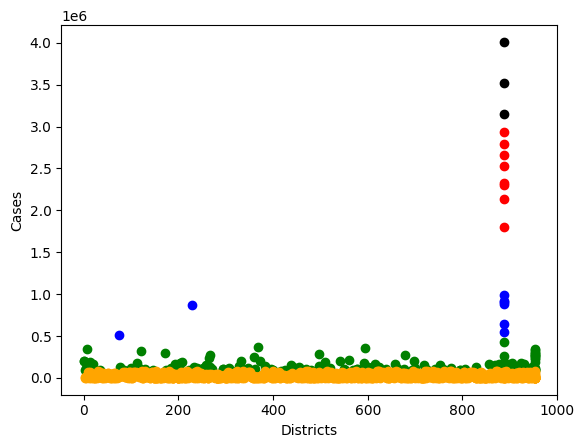

In [130]:
df1 = d[d.cluster==0]
df2 = d[d.cluster==1]
df3 = d[d.cluster==2]
df4 = d[d.cluster==3]
df5 = d[d.cluster==4]

plt.scatter(df1['DISTRICT'],df1['CASES'],color='green')
plt.scatter(df2['DISTRICT'],df2['CASES'],color='red')
plt.scatter(df3['DISTRICT'],df3['CASES'],color='blue')
plt.scatter(df4['DISTRICT'],df4['CASES'],color='black')
plt.scatter(df5['DISTRICT'],df5['CASES'],color='orange')

# plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='centroid')
plt.xlabel('Districts')
plt.ylabel('Cases')
plt.show()

In [131]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

d['CASES'] = scaler.fit_transform(d[['CASES']])

In [132]:
km = KMeans(n_clusters=5)
y_pred = km.fit_predict(d[['STATE','DISTRICT', 'CASES']])
d['cluster'] = y_pred
d['cluster'].value_counts()

2    254
0    215
1    213
4    202
3    201
Name: cluster, dtype: int64

In [133]:
print(d[d.cluster==0])
print(d[d.cluster==1])
print(d[d.cluster==2])
print(d[d.cluster==3])
print(d[d.cluster==4])

      STATE  DISTRICT     CASES  cluster
13        1       204  0.024269        0
14        1       207  0.047019        0
15        1       261  0.032560        0
16        1       325  0.000131        0
17        1       326  0.001075        0
...     ...       ...       ...      ...
1054     36       353  0.009337        0
1055     36       354  0.001654        0
1056     36       355  0.002207        0
1057     36       356  0.002150        0
1058     36       357  0.000125        0

[215 rows x 4 columns]
      STATE  DISTRICT     CASES  cluster
3         0       641  0.000098        1
4         0       644  0.000108        1
5         0       645  0.000049        1
27        1       623  0.032375        1
28        1       639  0.026543        1
...     ...       ...       ...      ...
1072     36       702  0.002350        1
1073     36       703  0.014795        1
1074     36       706  0.007213        1
1075     36       778  0.000171        1
1076     36       779  0.001493  

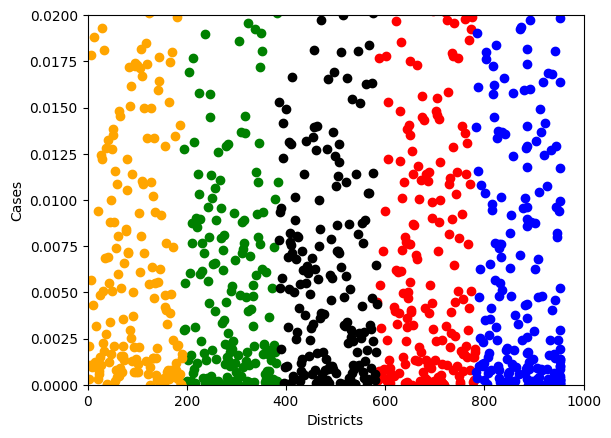

In [134]:
df1 = d[d.cluster==0]
df2 = d[d.cluster==1]
df3 = d[d.cluster==2]
df4 = d[d.cluster==3]
df5 = d[d.cluster==4]

plt.scatter(df1['DISTRICT'],df1['CASES'],color='green')
plt.scatter(df2['DISTRICT'],df2['CASES'],color='red')
plt.scatter(df3['DISTRICT'],df3['CASES'],color='blue')
plt.scatter(df4['DISTRICT'],df4['CASES'],color='black')
plt.scatter(df5['DISTRICT'],df5['CASES'],color='orange')

# plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='centroid')
plt.xlabel('Districts')
plt.ylabel('Cases')
plt.xlim(0,1000)
plt.ylim(0,0.02)
plt.show()

In [135]:
# d['STATE'] = le.inverse_transform(d['STATE'])
# d['DISTRICT'] = le.inverse_transform(d['DISTRICT'])
d.iloc[1080]

STATE        36.00000
DISTRICT    809.00000
CASES         0.00267
cluster       2.00000
Name: 1080, dtype: float64

In [136]:
a = d.iloc[:,:-2]
b = d.iloc[:,-1]

In [137]:
from sklearn.model_selection import train_test_split
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2)

In [138]:
print(len(a_train))
print(len(a_test))

868
217


## Classification

### KNN classification

In [139]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(a_train, b_train)
KNeighborsClassifier(n_neighbors=10)
knn.score(a_test, b_test)

1.0

### Linear Regression

In [140]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [141]:
y_pred

array([  4902.54190502, 136909.25911871,   1178.19255615,  -3183.23971273,
        88554.35133063, 111742.2968407 , 131003.17125862,  93798.81922793,
       126031.2378661 ,  84961.15735023,  87429.74364119, 108149.1028603 ,
        63582.2229219 ,  12836.72061863,  70473.5840887 , 132863.30117949,
        93034.67044659, 127161.97981623,  84600.69844214,  72333.71400957,
        15342.11247377, 103777.4468236 ,  17988.8834652 ,  96017.36330333,
       124818.41463306,  17030.19195485,  15047.08567977,  30612.23729874,
        86358.29954445, 115128.67957069,  84133.62120835,  88337.3163124 ,
        16446.27262755,  69053.94960526,  17212.46616247, 131652.52270002,
       127014.46641923,  52868.07309481, 124216.09252367,  -3806.00935777,
        55346.88315359, 101433.88164042, 107360.41703617,  94880.4870925 ,
        78995.77163674, 111891.85499126,  60980.4365089 ,  61914.59097647,
        10704.05619299, 123228.7744634 , 128395.25058493, 121217.0416384 ,
       134612.72326754,  

In [142]:
pd.DataFrame(
    {
        'Actual' : y_test,
        'Predicted' : y_pred
    }
)

,Actual,Predicted
702,58265,4902.541905
1083,59936,136909.259119
530,27747,1178.192556
593,75466,-3183.239713
141,119098,88554.351331
...,...,...
293,1540,81531.834795
194,158915,106921.966352
665,4822,53796.093302
922,9,38517.789462


In [143]:
from sklearn import metrics
print(metrics.r2_score(y_test, y_pred))
print(metrics.mean_absolute_percentage_error(y_test, y_pred))

0.015667190614891524
9.309443479657329e+17


The results obtained are not efficient.

### Logistic Regression

In [144]:
a.sample(5)

,STATE,DISTRICT
893,31,875
592,21,9
230,9,835
979,34,408
626,21,698


In [145]:
d.iloc[25]

STATE         1.000000
DISTRICT    552.000000
CASES         0.024852
cluster       3.000000
Name: 25, dtype: float64

In [146]:
from sklearn.linear_model import LogisticRegression
model  = LogisticRegression()
model.fit(a_train, b_train)

LogisticRegression()

In [147]:
model.score(a_test, b_test)

0.4930875576036866

In [148]:
model.predict([[36, 809]])[0]

3

In [149]:
b_pred = model.predict(a_test)
b_pred

array([0, 2, 0, 2, 3, 4, 2, 2, 0, 2, 4, 4, 1, 3, 2, 2, 2, 0, 3, 2, 4, 2,
       0, 2, 4, 2, 0, 2, 3, 2, 2, 3, 3, 2, 3, 2, 2, 2, 4, 2, 0, 2, 0, 0,
       4, 3, 3, 1, 3, 4, 0, 2, 2, 3, 2, 2, 3, 2, 2, 2, 0, 2, 0, 1, 0, 1,
       4, 2, 0, 2, 1, 2, 0, 1, 2, 0, 0, 2, 3, 3, 1, 3, 2, 3, 0, 4, 0, 4,
       2, 3, 4, 2, 0, 0, 3, 2, 2, 0, 3, 2, 0, 2, 4, 4, 2, 2, 0, 4, 2, 3,
       3, 0, 3, 4, 2, 0, 3, 3, 0, 3, 2, 0, 2, 2, 2, 2, 4, 0, 3, 2, 2, 4,
       2, 3, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 3, 2, 2, 1, 4, 2, 2, 3, 2, 2,
       0, 4, 2, 2, 2, 0, 2, 1, 2, 4, 0, 2, 2, 2, 3, 2, 2, 0, 0, 0, 3, 2,
       0, 2, 3, 4, 2, 4, 2, 2, 4, 2, 4, 0, 2, 3, 2, 2, 0, 3, 0, 2, 4, 3,
       2, 3, 2, 4, 3, 2, 3, 3, 4, 4, 0, 3, 2, 4, 2, 2, 3, 4, 3],
      dtype=int32)

Text(50.722222222222214, 0.5, 'Truth')

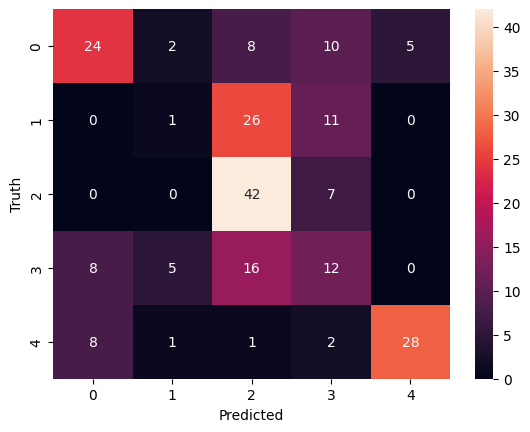

In [150]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(b_test, b_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Random Forest Classifier

In [151]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=40)
model.fit(a_train, b_train)

RandomForestClassifier(n_estimators=40)

In [152]:
model.score(a_test, b_test)

0.9953917050691244

In [153]:
import warnings
warnings.filterwarnings("ignore")
prediction = model.predict(a_test)
prediction

array([3, 3, 4, 0, 0, 4, 2, 0, 0, 1, 4, 0, 0, 1, 2, 2, 2, 0, 2, 2, 4, 1,
       0, 1, 0, 3, 0, 3, 3, 2, 1, 1, 1, 3, 1, 3, 2, 1, 4, 1, 0, 2, 3, 4,
       4, 3, 1, 0, 3, 4, 4, 3, 3, 0, 2, 3, 0, 1, 2, 0, 0, 1, 4, 3, 0, 1,
       4, 2, 0, 3, 3, 2, 0, 4, 2, 0, 0, 1, 3, 3, 3, 2, 3, 0, 0, 4, 0, 0,
       2, 3, 4, 1, 0, 0, 1, 1, 1, 4, 2, 2, 0, 3, 4, 4, 3, 0, 0, 4, 2, 3,
       1, 3, 3, 4, 2, 4, 2, 4, 4, 0, 0, 0, 2, 2, 1, 2, 4, 3, 1, 1, 1, 4,
       1, 1, 2, 2, 2, 1, 4, 3, 4, 3, 1, 2, 1, 2, 2, 3, 4, 2, 1, 1, 1, 4,
       0, 4, 2, 3, 1, 0, 0, 3, 2, 4, 0, 2, 2, 2, 0, 2, 0, 4, 0, 3, 2, 2,
       0, 0, 3, 4, 2, 4, 1, 1, 0, 1, 4, 0, 2, 3, 1, 2, 3, 3, 3, 2, 4, 3,
       2, 4, 3, 4, 0, 2, 0, 2, 4, 4, 3, 2, 2, 4, 2, 1, 0, 4, 0],
      dtype=int32)

In [154]:
pd.DataFrame(
    {
        'Actual' : b_test,
        'Predicted' : prediction
    }
).sample(10)

,Actual,Predicted
95,3,3
872,1,1
338,3,3
649,0,0
1078,2,2
929,2,2
711,0,0
385,0,0
806,0,0
600,4,4


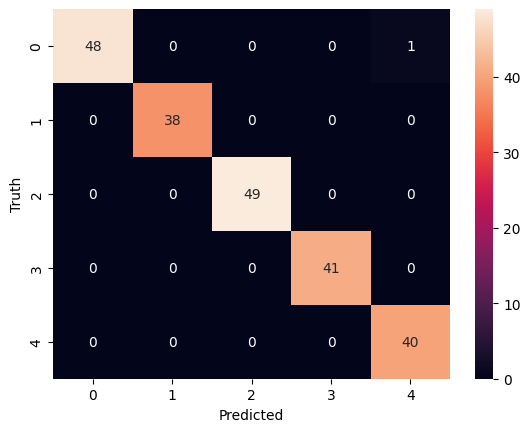

In [155]:
cf_matrix = confusion_matrix(b_test, prediction)
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

### Decision Tree Classifier

In [156]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy')

In [157]:
model.fit(a_train, b_train)

DecisionTreeClassifier(criterion='entropy')

In [158]:
# d['STATE'] = le.inverse_transform(d['STATE'])
# d['DISTRICT'] = le.inverse_transform(d['DISTRICT'])
d.iloc[1080]
# a['STATE'].unique()

STATE        36.00000
DISTRICT    809.00000
CASES         0.00267
cluster       2.00000
Name: 1080, dtype: float64

In [159]:
model.score(a_test, b_test)

0.9953917050691244

In [160]:
model.predict([[1, 552]])[0]

3

In [161]:
import warnings
warnings.filterwarnings("ignore")
prediction = model.predict(a_test)
prediction

array([3, 3, 4, 0, 0, 4, 2, 0, 0, 1, 4, 0, 0, 1, 2, 2, 2, 0, 2, 2, 4, 1,
       0, 1, 0, 3, 0, 3, 3, 2, 1, 1, 1, 3, 1, 3, 2, 1, 4, 1, 0, 2, 3, 4,
       4, 3, 1, 0, 3, 4, 4, 3, 3, 0, 2, 3, 0, 1, 2, 0, 0, 1, 4, 3, 0, 1,
       4, 2, 0, 3, 3, 2, 0, 4, 2, 0, 0, 1, 3, 3, 3, 2, 3, 0, 0, 4, 0, 0,
       2, 3, 4, 1, 0, 0, 1, 1, 1, 4, 2, 2, 0, 3, 4, 4, 3, 0, 0, 4, 2, 3,
       1, 3, 3, 4, 2, 4, 2, 4, 4, 0, 0, 0, 2, 2, 1, 2, 4, 3, 1, 1, 1, 4,
       1, 1, 2, 2, 2, 1, 4, 3, 4, 3, 1, 2, 1, 2, 2, 3, 4, 2, 1, 1, 1, 4,
       0, 4, 2, 3, 1, 0, 0, 3, 2, 4, 0, 2, 2, 2, 0, 2, 0, 4, 0, 3, 2, 2,
       0, 0, 3, 4, 2, 4, 1, 1, 0, 1, 4, 0, 2, 3, 1, 2, 3, 3, 3, 2, 4, 3,
       2, 4, 3, 4, 0, 2, 0, 2, 4, 4, 3, 2, 2, 4, 2, 1, 0, 4, 0],
      dtype=int32)

In [162]:
pd.DataFrame(
    {
        'Actual' : b_test,
        'Predicted' : prediction
    }
).sample(10)

,Actual,Predicted
13,0,0
990,3,3
1065,3,3
401,1,1
129,3,3
199,2,2
14,0,0
747,2,2
1081,2,2
170,4,4


Text(50.722222222222214, 0.5, 'Truth')

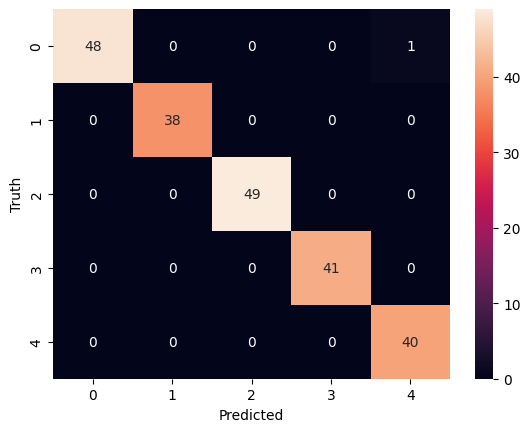

In [163]:
cf_matrix = confusion_matrix(b_test, prediction)
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### k-cross validation

In [164]:
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(a_train, b_train)
lr.score(a_test, b_test)

0.8110599078341014

In [165]:
knn = KNeighborsClassifier()
knn.fit(a_train, b_train)
knn.score(a_test, b_test)

1.0

In [166]:
rf = RandomForestClassifier()
rf.fit(a_train, b_train)
rf.score(a_test, b_test)

0.9953917050691244

In [167]:
dt = DecisionTreeClassifier()
dt.fit(a_train, b_train)
dt.score(a_test, b_test)

0.9953917050691244

In [168]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

scores_logistic = []
scores_dt = []
scores_rf = []
scores_knn = []

print('Logistic Regression      : %0.3f' %get_score(LogisticRegression(solver='liblinear',multi_class='ovr'), a_train, a_test, b_train, b_test))
print('Decision Tree Classifier : %0.3f' %get_score(DecisionTreeClassifier(), a_train, a_test, b_train, b_test))
print('Random Forest Classifier : %0.3f' %get_score(RandomForestClassifier(n_estimators=40), a_train, a_test, b_train, b_test))
print('KNN Classifier           : %0.3f' %get_score(KNeighborsClassifier(n_neighbors=10), a_train, a_test, b_train, b_test))

Logistic Regression      : 0.811
Decision Tree Classifier : 0.995
Random Forest Classifier : 0.995
KNN Classifier           : 1.000


In [169]:
from sklearn.model_selection import cross_val_score
print("Logistic Regression :      " + str(cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), a_train, b_train ,cv=3)))
print("Decision Tree Classifier : " + str(cross_val_score(DecisionTreeClassifier(), a_train, b_train ,cv=3)))
print("Random Forest Classifier : " + str(cross_val_score(RandomForestClassifier(n_estimators=40, criterion='entropy'), a_train, b_train ,cv=3)))
print("KNN Classifier :           " + str(cross_val_score(KNeighborsClassifier(n_neighbors=10), a_train, b_train ,cv=3)))

Logistic Regression :      [0.79655172 0.71626298 0.79584775]
Decision Tree Classifier : [0.99655172 0.99653979 0.99653979]
Random Forest Classifier : [0.9862069  0.99653979 0.99653979]
KNN Classifier :           [0.97241379 0.98961938 0.98269896]


In [170]:
# score1 = cross_val_score(RandomForestClassifier(n_estimators=5), a_train, b_train , cv=10)
# score2 = cross_val_score(RandomForestClassifier(n_estimators=20), a_train, b_train , cv=10)
# score3 = cross_val_score(RandomForestClassifier(n_estimators=30), a_train, b_train , cv=10)
# score4 = cross_val_score(RandomForestClassifier(n_estimators=40), a_train, b_train , cv=10)

# print("Random Forest Classifier with 5 trees  : %0.5f" %np.average(score1))
# print("Random Forest Classifier with 20 trees : %0.5f" %np.average(score2))
# print("Random Forest Classifier with 30 trees : %0.5f" %np.average(score3))
# print("Random Forest Classifier with 40 trees : %0.5f" %np.average(score4))

# print("\nBest average score is %0.5f" %max(np.average(score1), np.average(score2), np.average(score3), np.average(score4)))

It is clearly evident that Decision Tree and Random Forest performs well. But Decision Trees is used here.
### **Why Decision Trees is chosen over Random Forest**

Random Forest Classifier gives varying accuracy which differs with respect to the 'n_estimators' parameter. This is because each time the train and test splits are fitted into the Random Forest model, a set of trees are constructed in real-time. But in Decision Tree model we have a standard accuracy. Hence, Decision Tree Classifier is preferred.

 


# Saving the Model

In [171]:
pickle.dump(model, open("model.pkl", "wb"))

In [172]:
# model = pickle.load(open("model.pkl", "rb"))

# y_pred = model.predict([[1, 552]])[0]
# y_pred